Imports

In [1]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms

from MLProject2Dataset import MLProject2Dataset, MLProject2DatasetSmall
from CNNModels import SimpleCNN, ComplexCNN
from helper_functions import display_conf_matrix, plot_training_progress, train_net, test_net

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import numpy as np

Επιλογή συσκευής

In [2]:
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

Ορισμός κλάσεων προβλέψεων

In [13]:
classes = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AKIEC',
    4: 'BKL',
    5: 'DF',
    6: 'VASC'
}

# 4. Απλό ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [3]:
image_transforms = transforms.Compose([
            transforms.Resize((50, 62), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)
# dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms(50, 62))

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [4]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [7]:
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [8]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

## 4.3 Γράφημα απώλειας και ευστοχίας

In [9]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [10]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

## 4.5 Υπολογισμός πίνακα σύγχησης

In [11]:
display_conf_matrix(y_preds, test, classes)

# 5. Σύνθετο ΣΝΔ

## 5.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [15]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)
# dataset = MLProject2DatasetSmall('./data/dermoscopy_classification', transform=image_transforms)

generator = torch.Generator().manual_seed(42)
train, validate, test = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [16]:
train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
validate_dataloader = DataLoader(validate, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test, batch_size=64, shuffle=False)

In [17]:
model = ComplexCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 5.2 Εκπαίδευση

In [18]:
epochs, t_loss, t_acc, v_loss, v_acc = train_net(model, train_dataloader, validate_dataloader, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda
[Epoch: 0, batch:     0] Train loss: 0.200, Train acc: 0.234 | Validation loss: 1.951, Validation acc: 0.009
[Epoch: 0, batch:    10] Train loss: 1.353, Train acc: 0.552 | Validation loss: 2.016, Validation acc: 0.009
[Epoch: 0, batch:    20] Train loss: 1.036, Train acc: 0.684 | Validation loss: 1.732, Validation acc: 0.513
[Epoch: 0, batch:    30] Train loss: 1.028, Train acc: 0.670 | Validation loss: 1.273, Validation acc: 0.671
[Epoch: 0, batch:    40] Train loss: 0.905, Train acc: 0.700 | Validation loss: 1.020, Validation acc: 0.705
[Epoch: 0, batch:    50] Train loss: 0.916, Train acc: 0.688 | Validation loss: 0.905, Validation acc: 0.710
[Epoch: 0, batch:    60] Train loss: 0.863, Train acc: 0.720 | Validation loss: 0.857, Validation acc: 0.709
[Epoch: 0, batch:    70] Train loss: 0.873, Train acc: 0.686 | Validation loss: 0.840, Validation acc: 0.712
[Epoch: 0, batch:    80] Train loss: 0.847, Train acc: 0.708 | Validation loss: 0.819, Validation acc: 0.713
[E

KeyboardInterrupt: 

## 5.3 Γράφημα απώλειας και ευστοχίας

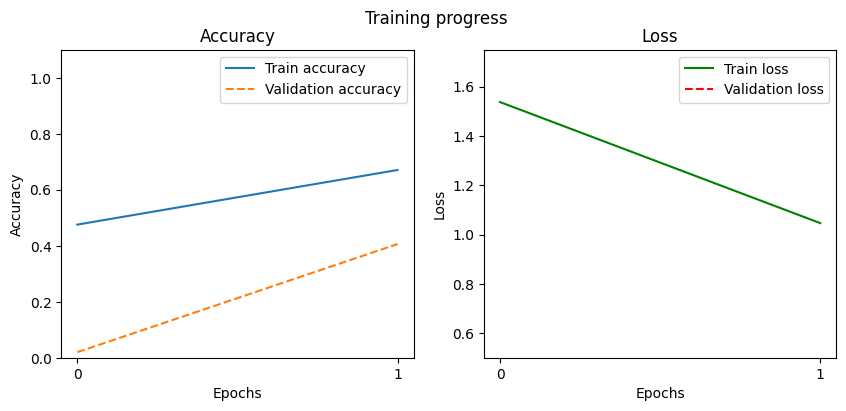

In [9]:
plot_training_progress(epochs, t_acc, v_acc, t_loss, v_loss)

## 5.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [10]:
y_preds = test_net(model, test_dataloader, loss_fn, device)

Average loss: 0.0301. Test accuracy in 304 images: 0.4211


## 5.5 Υπολογισμός πίνακα σύγχησης

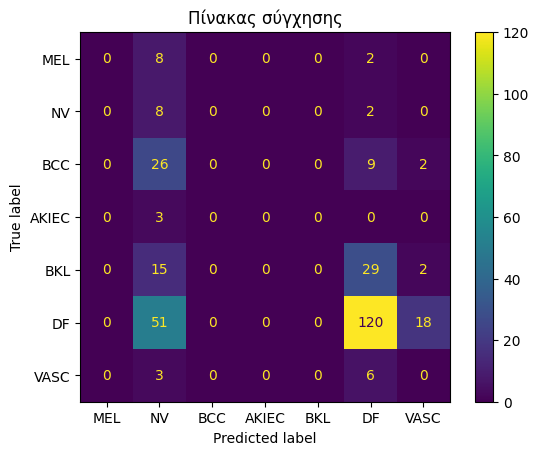

In [14]:
display_conf_matrix(y_preds, test, classes)